In [1]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('rst2.csv')
df2 = pd.read_csv('rst3.csv')
df3 = pd.read_csv('rst6.csv')
df4 = pd.read_csv('rst7.csv')
df5 = pd.read_csv('rst8.csv')

In [3]:
# Update the task mapping with correct column names
tasks = {
    "Collect wood": "collect_wood",
    "Place table": "place_table",
    "Make wood pickaxe": "make_wood_pickaxe",
    "Collect stone": "collect_stone",
    "Make stone pickaxe": "make_stone_pickaxe",
    "Collect iron": "collect_iron",
    "Collect coal": "collect_coal",
    "Place furnace": "place_furnace",
    "Make iron pickaxe": "make_iron_pickaxe",
    "Collect diamond": "collect_diamond",

}

# Find the first step for each task completion
task_completion_steps1 = {task_name: df1[df1[task_col] == 1]['step'].min() for task_name, task_col in tasks.items()}
task_completion_steps2 = {task_name: df2[df2[task_col] == 1]['step'].min() for task_name, task_col in tasks.items()}
task_completion_steps3 = {task_name: df3[df3[task_col] == 1]['step'].min() for task_name, task_col in tasks.items()}
task_completion_steps4 = {task_name: df4[df4[task_col] == 1]['step'].min() for task_name, task_col in tasks.items()}
task_completion_steps5 = {task_name: df5[df5[task_col] == 1]['step'].min() for task_name, task_col in tasks.items()}


NameError: name 'df1' is not defined

In [4]:
# for each same item, make it a list, and merge them
task_completion_steps = {task_name: [task_completion_steps1[task_name], task_completion_steps2[task_name], task_completion_steps3[task_name], task_completion_steps4[task_name], task_completion_steps5[task_name]] for task_name in tasks.keys()}

In [10]:
# Define the task names in the order they appear in the txt file
tasks = [
    "Collect wood", "Place table", "Make wood pickaxe", "Collect stone", "Make stone pickaxe",
    "Collect iron", "Collect coal", "Place furnace", "Make iron pickaxe", "Collect diamond"
]

# Read the txt file and remove empty lines
with open('6_agent.txt', 'r') as f:
    lines = [line.strip() for line in f if line.strip()]

# Group every 10 lines as one agent/trial's results
n_tasks = len(tasks)
data = []
for i in range(0, len(lines), n_tasks):
    group = lines[i:i+n_tasks]
    row = []
    for item in group:
        # Extract the numeric value (step) from each line
        value = float(item.split()[-1])
        row.append(value)
    data.append(row)

# Create a DataFrame: each row is an agent/trial, each column is a task
df = pd.DataFrame(data, columns=tasks)

In [11]:
import matplotlib.pyplot as plt
import numpy as np



# Task data provided by the user
task_data = df
task_means = {task: np.nanmean(steps) for task, steps in task_data.items()}
task_std = {task: np.nanstd(steps) for task, steps in task_data.items()}
task_means = {task: np.nanmean(steps) for task, steps in task_data.items()}
task_std = {task: np.nanstd(steps) for task, steps in task_data.items()}
print(task_means)
print(task_std)

{'Collect wood': np.float64(4.0), 'Place table': np.float64(9.2), 'Make wood pickaxe': np.float64(12.0), 'Collect stone': np.float64(20.6), 'Make stone pickaxe': np.float64(28.8), 'Collect iron': np.float64(62.6), 'Collect coal': np.float64(67.2), 'Place furnace': np.float64(80.8), 'Make iron pickaxe': np.float64(81.8), 'Collect diamond': np.float64(85.4)}
{'Collect wood': np.float64(1.0954451150103321), 'Place table': np.float64(2.6381811916545836), 'Make wood pickaxe': np.float64(4.427188724235731), 'Collect stone': np.float64(10.68831137270991), 'Make stone pickaxe': np.float64(16.33891061240008), 'Collect iron': np.float64(20.75186738585229), 'Collect coal': np.float64(15.72768260107), 'Place furnace': np.float64(17.61135997020105), 'Make iron pickaxe': np.float64(17.61135997020105), 'Collect diamond': np.float64(16.131955864060625)}


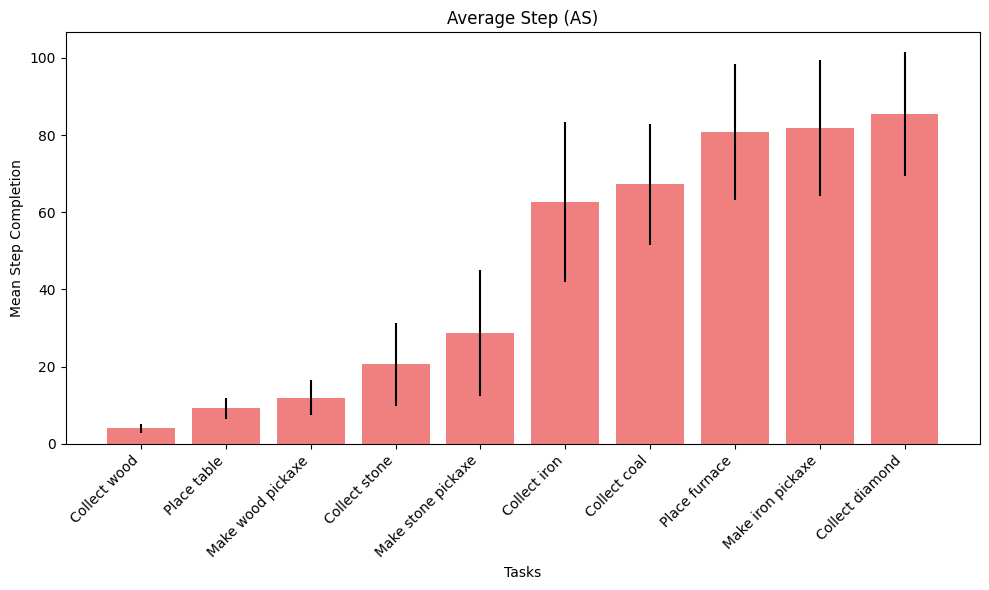

In [12]:
# Plot the means
plt.figure(figsize=(10, 6))
plt.bar(task_means.keys(), task_means.values(), yerr=task_std.values(), color='lightcoral')

# Add labels and title
plt.xlabel('Tasks')
plt.ylabel('Mean Step Completion')
plt.title('Average Step (AS)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
success_rates = {
    'Collect wood': 100,
    'Place table': 100,
    'Make wood pickaxe': 100,
    'Collect stone': 100,
    'Make stone pickaxe': 100,
    'Collect iron': 100,
    'Collect coal': 100,
    'Place furnace': 80,  # NaN suggests a 20% failure rate
    
    'Make iron pickaxe': 60,  # Some NaN values reduce success
    'Collect diamond': 60,  # Some NaN values reduce success
}

/var/folders/gg/1llqtmtj0f55wvjjs16m3bgr0000gn/T/ipykernel_80361/2495668536.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(task_means.keys(), rotation=45, ha='right')


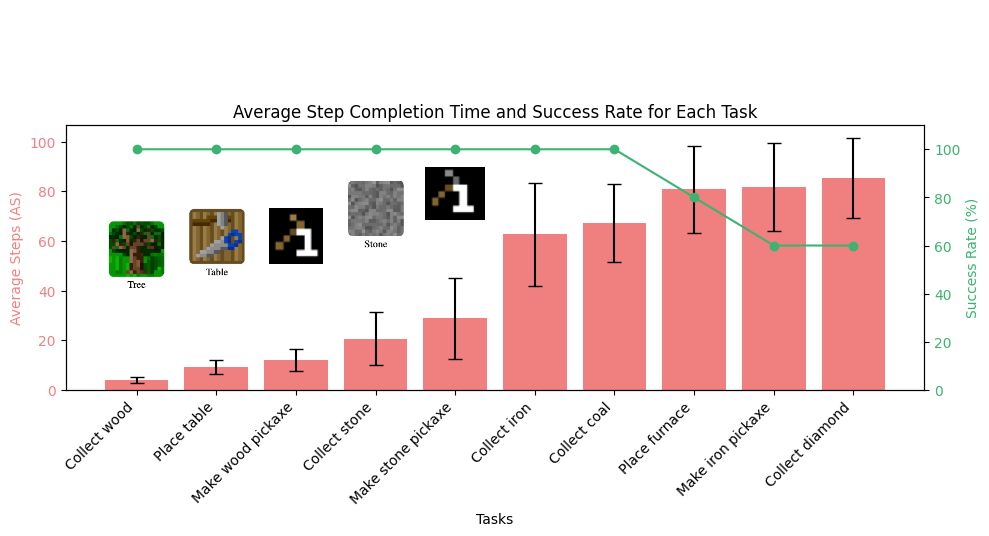

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the mean step completion with standard deviation as error bars on the left y-axis
ax1.bar(task_means.keys(), task_means.values(), yerr=task_std.values(), capsize=5, color='lightcoral', label='Mean Step Completion')
ax1.set_xlabel('Tasks')
ax1.set_ylabel('Average Steps (AS)', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')
ax1.set_xticklabels(task_means.keys(), rotation=45, ha='right')
# Create a second y-axis to plot success rate
ax2 = ax1.twinx()
ax2.plot(success_rates.keys(), success_rates.values(), color='mediumseagreen', marker='o', label='Success Rate')
ax2.set_ylabel('Success Rate (%)', color='mediumseagreen')
ax2.tick_params(axis='y', labelcolor='mediumseagreen')
ax2.set_ylim(0, 110)
picture_names = ['icons/wood.png', 'icons/table.png', 'icons/wood_pickaxe.png', 'icons/stone.png', 'icons/stone_pickaxe.png', 'icons/iron.png', 'icons/coal.png', 'icons/furnace.png', 'icons/iron_pickaxe.png', 'icons/diamond.png']
# Adding images to x-axis labels

for i, (task, zoom_ratio) in enumerate(zip(task_means.keys(), [0.4, 0.4, 0.8, 0.4, 0.8, 0.4, 0.4, 0.4, 0.8, 0.4,])):
    img = mpimg.imread(picture_names[i])
    imagebox = OffsetImage(img, zoom=zoom_ratio)
    # place it on the top of the bar
    ab = AnnotationBbox(imagebox, (i, task_means[task]+50), frameon=False)
    ax1.add_artist(ab)
    #ab = AnnotationBbox(imagebox, (i, 0), frameon=False)
    #ax1.add_artist(ab)

# Adjusting the layout to prevent overlap
plt.title('Average Step Completion Time and Success Rate for Each Task')
fig.tight_layout()

# Display the plot with the images on the x-axis
plt.show()

In [16]:
task_means

{'Collect wood': np.float64(4.0),
 'Place table': np.float64(9.2),
 'Make wood pickaxe': np.float64(12.0),
 'Collect stone': np.float64(20.6),
 'Make stone pickaxe': np.float64(28.8),
 'Collect iron': np.float64(62.6),
 'Collect coal': np.float64(67.2),
 'Place furnace': np.float64(80.8),
 'Make iron pickaxe': np.float64(81.8),
 'Collect diamond': np.float64(85.4)}

In [17]:
task_std

{'Collect wood': np.float64(1.0954451150103321),
 'Place table': np.float64(2.6381811916545836),
 'Make wood pickaxe': np.float64(4.427188724235731),
 'Collect stone': np.float64(10.68831137270991),
 'Make stone pickaxe': np.float64(16.33891061240008),
 'Collect iron': np.float64(20.75186738585229),
 'Collect coal': np.float64(15.72768260107),
 'Place furnace': np.float64(17.61135997020105),
 'Make iron pickaxe': np.float64(17.61135997020105),
 'Collect diamond': np.float64(16.131955864060625)}

In [25]:
import pandas as pd

# 读取原始csv
csv_file = '/Users/brenda/Desktop/AI_Agents/1012_6_agent/results/6_agent.csv'
df_raw = pd.read_csv(csv_file, sep=r'\s{2,}|\t', engine='python', header=None, names=['task', 'steps'])


# 每10行为一组，分组并重塑为一行
group_size = 10
num_groups = len(df_raw) // group_size

# 生成新的DataFrame，每行一组实验，每列一个任务
data = []
for i in range(num_groups):
    group = df_raw.iloc[i*group_size:(i+1)*group_size]
    data.append(group['steps'].values)
columns = df_raw['task'][:group_size].values  # 取前10个任务名作为列名
df = pd.DataFrame(data, columns=columns)

# 保存为新的csv（可选）
df.to_csv('/Users/brenda/Desktop/AI_Agents/1012_6_agent/results/6_agent_wide.csv', index=False)

# 查看结果
print(df)

   Collect wood  Place table  Make wood pickaxe  Collect stone  \
0           5.0          7.0                8.0           10.0   
1           5.0          8.0               13.0           16.0   
2           4.0         14.0               20.0           41.0   
3           4.0         10.0               11.0           20.0   
4           2.0          7.0                8.0           16.0   

   Make stone pickaxe  Collect iron  Collect coal  Place furnace  \
0                13.0          57.0          45.0           62.0   
1                20.0          49.0          53.0           57.0   
2                60.0          95.0          78.0           99.0   
3                28.0          36.0          73.0           94.0   
4                23.0          76.0          87.0           92.0   

   Make iron pickaxe  Collect diamond  
0               63.0             73.0  
1               58.0             60.0  
2              100.0            102.0  
3               95.0             9

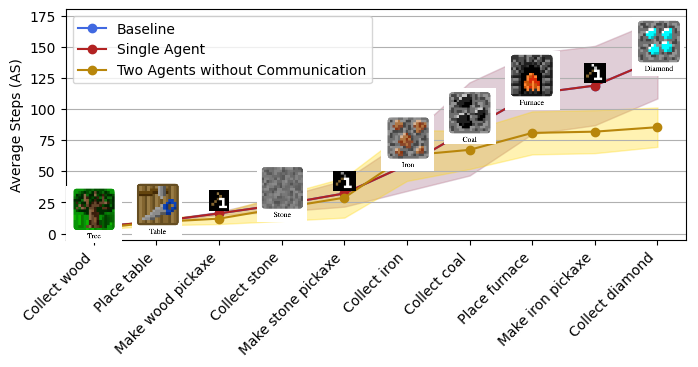

In [27]:
# Sample image paths (replace with actual paths)
picture_names = ['icons/wood.png', 'icons/table.png', 'icons/wood_pickaxe.png', 'icons/stone.png', 
                 'icons/stone_pickaxe.png', 'icons/iron.png', 'icons/coal.png', 'icons/furnace.png', 
                 'icons/iron_pickaxe.png', 'icons/diamond.png']

def plot_figure_with_icons(dfs, legend_labels=None, picture_names=None):
    means_all = []
    means_max = []
    ci_lower_all = []
    ci_upper_all = []

    df = dfs[0]
    baseline_mean_values = df.mean(axis=0).values
    baseline_error_values = df.std(axis=0).values


    means_all.append(baseline_mean_values)
    ci_lower_all.append(np.array(baseline_mean_values) - 1.96 * np.array(baseline_error_values) / np.sqrt(5))
    ci_upper_all.append(np.array(baseline_mean_values) + 1.96 * np.array(baseline_error_values) / np.sqrt(5))
    for df in dfs:
        means = df.mean(axis=0)
        stds = df.std(axis=0)

        # Calculate 95% confidence interval (mean ± 1.96 * std / sqrt(n))
        n = df.shape[0]  # Number of experiments
        ci_lower = means - 1.96 * stds / np.sqrt(n)
        ci_upper = means + 1.96 * stds / np.sqrt(n)
        
        means_all.append(means)
        
        ci_lower_all.append(ci_lower)
        ci_upper_all.append(ci_upper)
        
    means_max = np.array(means_all)
    means_max = np.max(means_max, axis=0)
    means_max = [means_max] * len(means_all)

    # Custom color scheme
    colors = [('royalblue', 'lightskyblue'), ('firebrick', 'lightcoral'), ('darkgoldenrod', 'gold'), ('mediumseagreen', 'lightgreen')]
    
    # Plotting the mean with confidence intervals
    x_values = np.arange(len(means))
    for means, ci_lower, ci_upper, label, color, means_max in zip(means_all, ci_lower_all, ci_upper_all, legend_labels, colors, means_max):
        plt.plot(x_values, means, '-o', label=label, color=color[0])
        plt.fill_between(x_values, ci_lower, ci_upper, color=color[1], alpha=0.3)

    # Adding images on top of scatter points
    for i, img_path in enumerate(picture_names[:len(x_values)]):
        # Load the image
        img = mpimg.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom to control image size
        
        # Create AnnotationBbox with OffsetImage
        ab = AnnotationBbox(imagebox, (x_values[i], means_max[i]+10), frameon=False)  # Position at scatter point
        plt.gca().add_artist(ab)

    plt.xticks(x_values, dfs[0].columns, rotation=45, ha='right')
    
    plt.ylabel('Average Steps (AS)')
    plt.legend()
    plt.grid(axis='y')

# Plotting
plt.figure(figsize=(8, 3))
baseline = pd.read_csv('/Users/brenda/Desktop/AI_Agents/1012_6_agent/results/1_llm_mem_rst_wide.csv')
single_agent = pd.read_csv('/Users/brenda/Desktop/AI_Agents/1012_6_agent/results/6_agent_wide.csv')
plot_figure_with_icons([baseline, single_agent], 
                       legend_labels=["Baseline", 'Single Agent', 'Two Agents without Communication', 'Two Agents with Communication'], 
                       picture_names=picture_names)
plt.show()

In [32]:
def plot_multiple_experiments_with_icons(
    csv_files,
    legend_labels=None,
    picture_names=None,
    colors=None,
    figsize=(10, 4)
):
    """
    Read CSV files and plot mean and 95% confidence interval for multiple experiment groups, with icons above each task.
    :param csv_files: List of CSV file paths, each for one experiment group (rows: rounds, columns: tasks)
    :param legend_labels: List of legend labels for each group
    :param picture_names: List of image paths for each task (order matches columns)
    :param colors: List of (main, fill) color tuples for each group
    :param figsize: Figure size
    """
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        # Drop rows and columns that are completely empty
        df = df.dropna(how='all').dropna(axis=1, how='all')
        # If the first column is not numeric (e.g., an index or label), drop it
        if not np.issubdtype(df.iloc[:,0].dtype, np.number):
            try:
                df = df.iloc[:, 1:]
            except Exception:
                pass
        # Try to convert all data to float, non-convertible values become NaN
        df = df.apply(pd.to_numeric, errors='coerce')
        dfs.append(df)
        
    # Set default icon paths if not provided
    if picture_names is None:
        picture_names = [
            'icons/wood.png', 'icons/table.png', 'icons/wood_pickaxe.png', 'icons/stone.png',
            'icons/stone_pickaxe.png', 'icons/iron.png', 'icons/coal.png', 'icons/furnace.png',
            'icons/iron_pickaxe.png', 'icons/diamond.png'
        ]
    # Set default colors if not provided
    if colors is None:
        colors = [
            ('royalblue', 'lightskyblue'),
            ('firebrick', 'lightcoral'),
            ('darkgoldenrod', 'gold'),
            ('mediumseagreen', 'lightgreen')
        ]
    # Set default legend labels if not provided
    if legend_labels is None:
        legend_labels = [f'Group {i+1}' for i in range(len(dfs))]

    means_all = []
    ci_lower_all = []
    ci_upper_all = []

    # Calculate mean and 95% confidence interval for each group
    for df in dfs:
        means = df.mean(axis=0)
        stds = df.std(axis=0)
        n = df.shape[0]
        ci_lower = means - 1.96 * stds / np.sqrt(n)
        ci_upper = means + 1.96 * stds / np.sqrt(n)
        means_all.append(means)
        ci_lower_all.append(ci_lower)
        ci_upper_all.append(ci_upper)

    # For icon placement: get the max mean+ci_upper for each task
    means_max = np.max([ci_upper for ci_upper in ci_upper_all], axis=0)

    x_values = np.arange(len(dfs[0].columns))
    plt.figure(figsize=figsize)
    # Plot each group's mean and confidence interval
    for means, ci_lower, ci_upper, label, color in zip(means_all, ci_lower_all, ci_upper_all, legend_labels, colors):
        plt.plot(x_values, means, '-o', label=label, color=color[0])
        plt.fill_between(x_values, ci_lower, ci_upper, color=color[1], alpha=0.3)

    # Add icons above each task
    for i, img_path in enumerate(picture_names[:len(x_values)]):
        try:
            img = mpimg.imread('/Users/brenda/Desktop/AI_Agents/1012_6_agent/'+img_path)
            imagebox = OffsetImage(img, zoom=0.3)
            ab = AnnotationBbox(imagebox, (x_values[i], means_max[i]+10), frameon=False)
            plt.gca().add_artist(ab)
        except Exception as e:
            print(f"Could not load icon for {dfs[0].columns[i]}: {e}")

    plt.xticks(x_values, dfs[0].columns, rotation=45, ha='right')
    plt.ylabel('Average Steps (AS)')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()





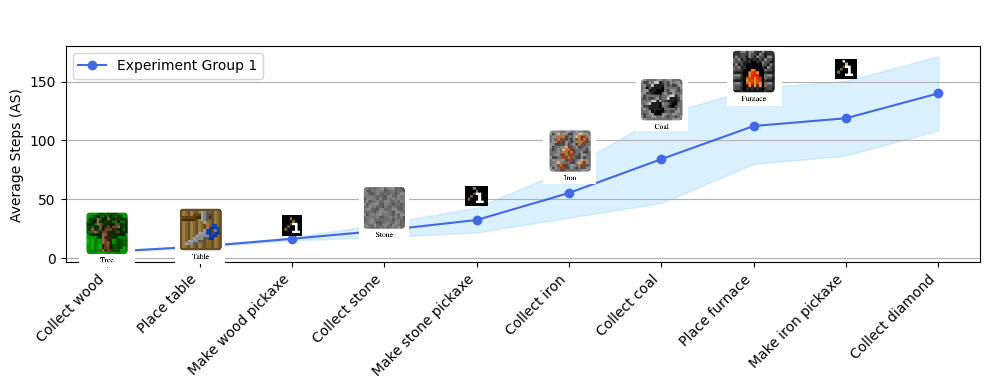

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
plot_multiple_experiments_with_icons(['/Users/brenda/Desktop/AI_Agents/1012_6_agent/results/1_llm_mem_rst_wide.csv',],legend_labels=['Experiment Group 1'])

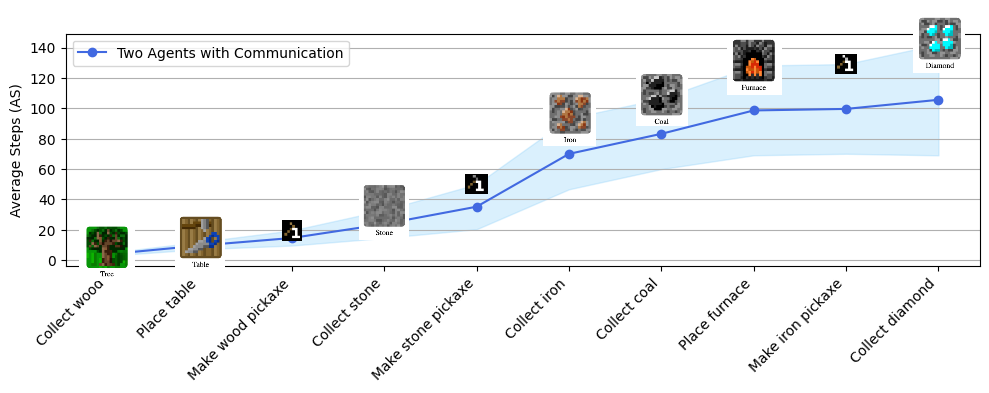

In [13]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

class Plotter:
    """
    A class for plotting experiment results with icons above each task.
    """
    def __init__(self, picture_names=None, colors=None, figsize=(10, 4)):
        # Set default icon paths if not provided
        if picture_names is None:
            picture_names = [
                'icons/wood.png', 'icons/table.png', 'icons/wood_pickaxe.png', 'icons/stone.png',
                'icons/stone_pickaxe.png', 'icons/iron.png', 'icons/coal.png', 'icons/furnace.png',
                'icons/iron_pickaxe.png', 'icons/diamond.png'
            ]
        # Set default colors if not provided
        if colors is None:
            colors = [
                ('royalblue', 'lightskyblue'),
                ('firebrick', 'lightcoral'),
                ('darkgoldenrod', 'gold'),
                ('mediumseagreen', 'lightgreen')
            ]
        self.picture_names = picture_names
        self.colors = colors
        self.figsize = figsize

    def plot(self, data_list, legend_labels=None):
        """
        Read CSV files and plot mean and 95% confidence interval for multiple experiment groups, with icons above each task.
        :param csv_files: List of CSV file paths, each for one experiment group (rows: rounds, columns: tasks)
        :param legend_labels: List of legend labels for each group
        """
        dfs = []
        for data in data_list:
            if isinstance(data, str):
                df = pd.read_csv(data)
            else:
                df = data
            # Drop rows and columns that are completely empty
            df = df.dropna(how='all').dropna(axis=1, how='all')
            # If the first column is not numeric (e.g., an index or label), drop it
            if not np.issubdtype(df.iloc[:,0].dtype, np.number):
                try:
                    df = df.iloc[:, 1:]
                except Exception:
                    pass
            # Try to convert all data to float, non-convertible values become NaN
            df = df.apply(pd.to_numeric, errors='coerce')
            dfs.append(df)

        if legend_labels is None:
            legend_labels = [f'Group {i+1}' for i in range(len(dfs))]

        means_all = []
        ci_lower_all = []
        ci_upper_all = []

        # Calculate mean and 95% confidence interval for each group
        for df in dfs:
            means = df.mean(axis=0)
            stds = df.std(axis=0)
            n = df.shape[0]
            ci_lower = means - 1.96 * stds / np.sqrt(n)
            ci_upper = means + 1.96 * stds / np.sqrt(n)
            means_all.append(means)
            ci_lower_all.append(ci_lower)
            ci_upper_all.append(ci_upper)

        # For icon placement: get the max mean+ci_upper for each task
        means_max = np.max([ci_upper for ci_upper in ci_upper_all], axis=0)

        x_values = np.arange(len(dfs[0].columns))
        plt.figure(figsize=self.figsize)
        # Plot each group's mean and confidence interval
        for means, ci_lower, ci_upper, label, color in zip(means_all, ci_lower_all, ci_upper_all, legend_labels, self.colors):
            plt.plot(x_values, means, '-o', label=label, color=color[0])
            plt.fill_between(x_values, ci_lower, ci_upper, color=color[1], alpha=0.3)

        # Add icons above each task
        for i, img_path in enumerate(self.picture_names[:len(x_values)]):
            try:
                full_path = os.path.join('/Users/brenda/Desktop/AI_Agents/1012_6_agent', img_path)
                img = mpimg.imread(full_path)
                imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom as needed
                ab = AnnotationBbox(imagebox, (x_values[i], means_max[i]), frameon=False, zorder=10)
                plt.gca().add_artist(ab)
            except Exception as e:
                print(f"Could not load icon for {dfs[0].columns[i]}: {e}")

        plt.xticks(x_values, dfs[0].columns, rotation=45, ha='right')
        plt.ylabel('Average Steps (AS)')
        plt.legend()
        plt.grid(axis='y')
        plt.tight_layout()
        plt.savefig('results/result_fig.png', bbox_inches='tight', dpi=300)
        plt.show()
plotter = Plotter()
plotter.plot(['/Users/brenda/Desktop/AI_Agents/1012_6_agent/results/all_rounds_stats.csv'], legend_labels=['Two Agents with Communication'])
